C:\Temp\ipykernel_3216\3060361620.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None,
C:\Temp\ipykernel_3216\3060361620.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['weight_to_hp'] = X['weight'] / X['horsepower']
C:\Temp\ipykernel_3216\3060361620.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['displacement_to_acc'] = X['dis

Accuracy without feature scaling: 0.8481012658227848


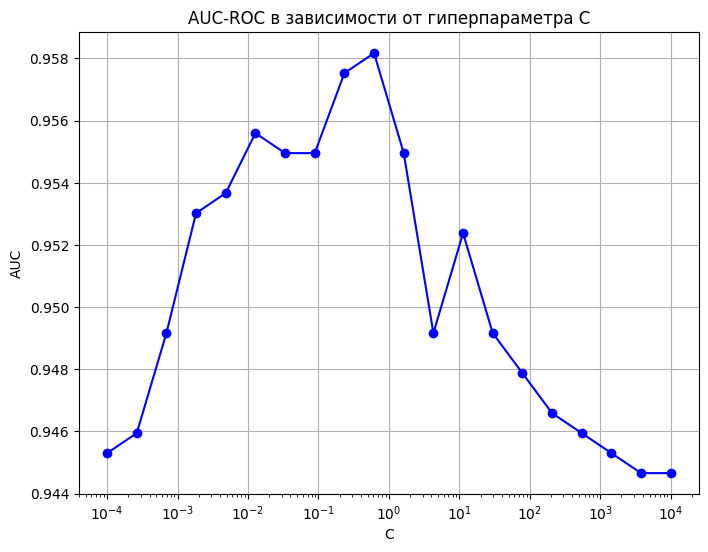

Базовая точность сохранена: 0.8481012658227848


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Загрузка данных (предполагается, что файл 'auto-mpg.data' находится в той же директории)
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"])

# Обработка пропусков (например, в столбце horsepower)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

# Целевая переменная: mpg (преобразуем в бинарную переменную для классификации)
df['mpg_binary'] = np.where(df['mpg'] > df['mpg'].median(), 1, 0)

# Отбор признаков
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
y = df['mpg_binary']

# Создание синтезированных признаков
X['weight_to_hp'] = X['weight'] / X['horsepower']
X['displacement_to_acc'] = X['displacement'] / X['acceleration']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy without feature scaling: {accuracy}')

# Подбор гиперпараметра C и построение графика AUC-ROC
C_values = np.logspace(-4, 4, 20)
mean_roc_auc = []

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    mean_roc_auc.append(roc_auc)

# Построение графика AUC-ROC
plt.figure(figsize=(8, 6))
plt.plot(C_values, mean_roc_auc, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('AUC')
plt.title('AUC-ROC в зависимости от гиперпараметра C')
plt.grid(True)
plt.show()

# Сохранение модели и точности на диск
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(accuracy, 'baseline_accuracy.pkl')

print(f'Базовая точность сохранена: {accuracy}')


**Вывод:** при значении гиперпараметра C, близком к 10, модель достигает наилучших результатов в задаче классификации.